# Dealiasing and Gridding using Py-ART

Let's start with a radar volume from the Kurnell (Sydney) radar from the [16 December 2015](hhttp://www.abc.net.au/news/2015-12-16/tornado-hail-destructive-winds-hit-sydney/7032370) tornado.  This file is again in the odimh5 file format specification.

<img class="logo" src="http://www.abc.net.au/news/image/7033218-3x2-700x467.png" width="500" align='left'/>

In [30]:
#load libraries
from matplotlib import pyplot as plt
import pyart
import numpy as np
%matplotlib inline

#load radar volume
radar = pyart.aux_io.read_odim_h5('data/54_20151215_231800.h5', file_field_names=True)

#Add field name information
radar.fields['DBZH']['standard_name'] = 'Reflectivity'
radar.fields['DBZH']['units'] = 'dBZ'
radar.fields['DBZH']['long_name'] = 'Radar Reflectivity Factor'
radar.fields['VRADH']['standard_name'] = 'Velocity'
radar.fields['VRADH']['units'] = 'm/s'
radar.fields['VRADH']['long_name'] = 'Radial Velocity of Scatterers'

#create radar display object
display = pyart.graph.RadarMapDisplay(radar)

---
Plotting a two panel PPI figure of Reflectivity and Doppler Velocity centred on Kurnell

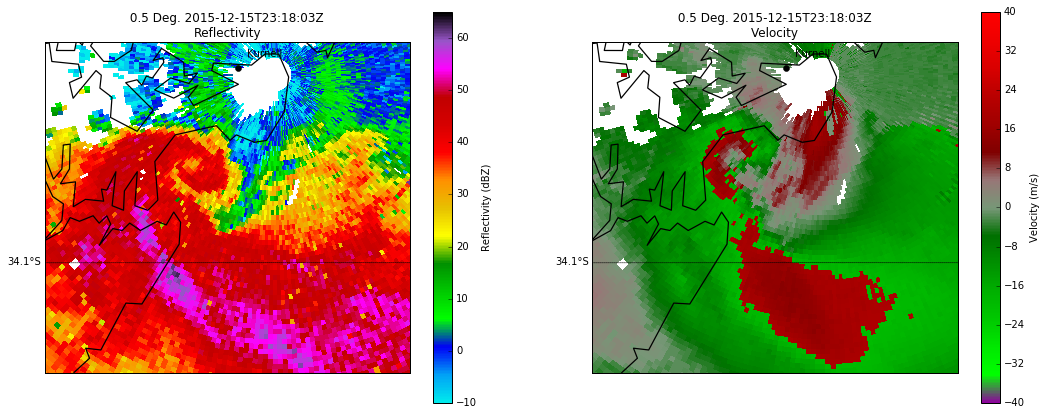

In [31]:
#Setup figure size
plt.figure(figsize=[18,7])

#Create first subplot (reflectivity)
plt.subplot(1,2,1)
display.plot_ppi_map('DBZH', sweep=0,
                        vmin=-10, vmax=65, cmap='pyart_NWSRef', resolution = 'h',
                        lat_lines = np.arange(-35,-34,.1), lon_lines = np.arange(149, 151, .1),
                        max_lat = -34, min_lat =-34.15, min_lon = 151.1, max_lon = 151.3)
display.plot_point( 151.206, -34.012,
                        label_text = 'Kurnell', 
                        label_offset=[.005,.005], symbol = 'ko' )

#Create second subplot (Doppler Velocity)
plt.subplot(1,2,2)
display.plot_ppi_map('VRADH', sweep=0,
                        vmin=-40, vmax=40, cmap='pyart_NWSVel', resolution = 'h',
                        lat_lines = np.arange(-35,-34,.1), lon_lines = np.arange(149, 151, .1),
                        max_lat = -34, min_lat =-34.15, min_lon = 151.1, max_lon = 151.3)
display.plot_point( 151.206, -34.012,
                        label_text = 'Kurnell', 
                        label_offset=[.005,.005], symbol = 'ko' )


---
The Doppler velocity plot shows some regions which have exceeded the nyquist velcoity of the radar and subsequently folded. Py-ART provides a methods to [correct](http://arm-doe.github.io/pyart-docs-travis/user_reference/correct.html) this folding in the velocity field. For todays tutorial, we will region the [region based](http://arm-doe.github.io/pyart-docs-travis/user_reference/generated/pyart.correct.dealias_region_based.html#pyart.correct.dealias_region_based) approach.

In [32]:
#Apply region based method from correct class to VRADH field for a nyquist velocity of 27
corr_vel   = pyart.correct.dealias_region_based(radar,
            vel_field='VRADH', nyquist_vel=21)
#Add corrected velocity back into radar object as the new field VRADH_corr
radar.add_field('VRADH_corr', corr_vel, False)

---
Let's see what it looks like before and after the correction.

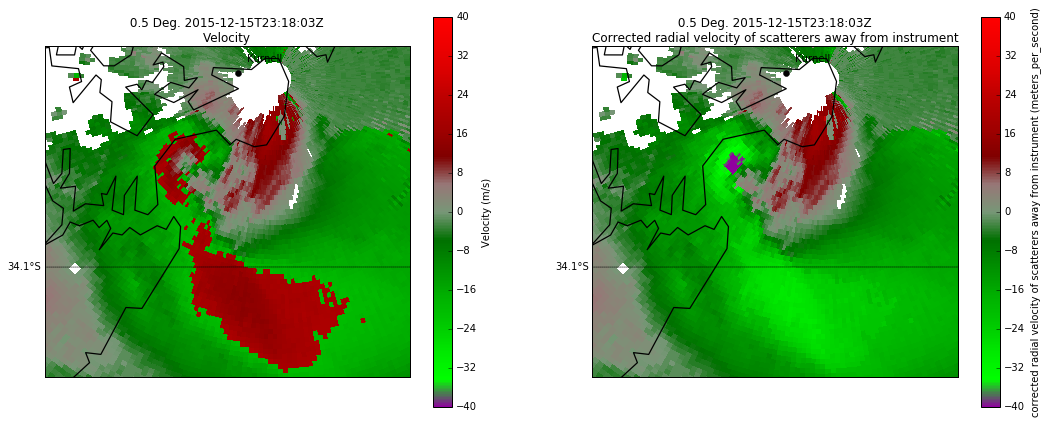

In [33]:
#Setup figure size
plt.figure(figsize=[18,7])

#Create first subplot (Doppler Velocity)
plt.subplot(1,2,1)
display.plot_ppi_map('VRADH', sweep=0,
                        vmin=-40, vmax=40, cmap='pyart_NWSVel', resolution = 'h',
                        lat_lines = np.arange(-35,-34,.1), lon_lines = np.arange(149, 151, .1),
                        max_lat = -34, min_lat =-34.15, min_lon = 151.1, max_lon = 151.3)
display.plot_point( 151.206, -34.012,
                        label_text = 'Kurnell', 
                        label_offset=[.005,.005], symbol = 'ko' )

#Create second subplot (corrected Doppler Velocity)
plt.subplot(1,2,2)
display.plot_ppi_map('VRADH_corr', sweep=0,
                        vmin=-40, vmax=40, cmap='pyart_NWSVel', resolution = 'h',
                        lat_lines = np.arange(-35,-34,.1), lon_lines = np.arange(149, 151, .1),
                        max_lat = -34, min_lat =-34.15, min_lon = 151.1, max_lon = 151.3)
display.plot_point( 151.206, -34.012,
                        label_text = 'Kurnell', 
                        label_offset=[.005,.005], symbol = 'ko' )


Kurnell also provides another radar moment - spectral width. This is a measure of the velocity spread within a radar sample. Let's look for this moment (WRADH)

In [34]:
radar.info()

altitude:
	data: <ndarray of type: float64 and shape: (1,)>
	units: meters
	long_name: Altitude
	standard_name: Altitude
	positive: up
altitude_agl: None
antenna_transition: None
azimuth:
	data: <ndarray of type: float32 and shape: (5040,)>
	comment: Azimuth of antenna relative to true north
	long_name: azimuth_angle_from_true_north
	standard_name: beam_azimuth_angle
	units: degrees
	axis: radial_azimuth_coordinate
elevation:
	data: <ndarray of type: float64 and shape: (5040,)>
	comment: Elevation of antenna relative to the horizontal plane
	long_name: elevation_angle_from_horizontal_plane
	standard_name: beam_elevation_angle
	units: degrees
	axis: radial_elevation_coordinate
fields:
	QCFLAGS:
		data: <ndarray of type: float32 and shape: (5040, 896)>
		_FillValue: -9999.0
	VRADH:
		data: <ndarray of type: float32 and shape: (5040, 896)>
		units: m/s
		_FillValue: -9999.0
		standard_name: Velocity
		long_name: Radial Velocity of Scatterers
	VRADH_corr:
		data: <ndarray of type: float32 

In [35]:
#Add field information for WRADH
radar.fields['WRADH']['standard_name'] = 'Spectrum Width'
radar.fields['WRADH']['units'] = 'm/s'
radar.fields['WRADH']['long_name'] = 'Distribution of Radial Velocity'

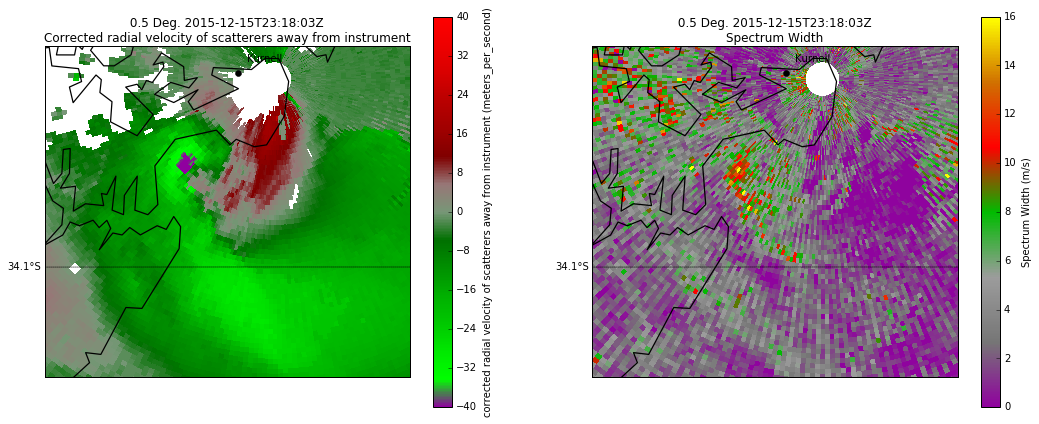

In [36]:
#Setup figure size
plt.figure(figsize=[18,7])

#Create first subplot (corrected Doppler Velocity)
plt.subplot(1,2,1)
display.plot_ppi_map('VRADH_corr', sweep=0,
                        vmin=-40, vmax=40, cmap='pyart_NWSVel', resolution = 'h',
                        lat_lines = np.arange(-35,-34,.1), lon_lines = np.arange(149, 151, .1),
                        max_lat = -34, min_lat =-34.15, min_lon = 151.1, max_lon = 151.3)
display.plot_point( 151.206, -34.012,
                        label_text = 'Kurnell', 
                        label_offset=[.005,.005], symbol = 'ko' )

#Create second subplot (Spectrum Width)
plt.subplot(1,2,2)
display.plot_ppi_map('WRADH', sweep=0,
                        vmin=0, vmax=16, cmap='pyart_NWS_SPW', resolution = 'h',
                        lat_lines = np.arange(-35,-34,.1), lon_lines = np.arange(149, 151, .1),
                        max_lat = -34, min_lat =-34.15, min_lon = 151.1, max_lon = 151.3)
display.plot_point( 151.206, -34.012,
                        label_text = 'Kurnell', 
                        label_offset=[.005,.005], symbol = 'ko' )

---
## Gridding

The zoomed plots clearly show the radial nature of the radar coordinate system. To extract information and analyse radar data, it is often easier to work in a cartesian coordinate system. To generate a grid using py-ART, let's use the [grid_from_radars](http://arm-doe.github.io/pyart-docs-travis/user_reference/generated/pyart.map.grid_from_radars.html#pyart.map.grid_from_radars) function. 

In [37]:
help(pyart.map.grid_from_radars)

Help on function grid_from_radars in module pyart.map.grid_mapper:

grid_from_radars(radars, grid_shape, grid_limits, gridding_algo='map_gates_to_grid', **kwargs)
    Map one or more radars to a Cartesian grid returning a Grid object.
    
    Additional arguments are passed to :py:func:`map_to_grid` or
    :py:func:`map_gates_to_grid`.
    
    Parameters
    ----------
    radars : Radar or tuple of Radar objects.
        Radar objects which will be mapped to the Cartesian grid.
    grid_shape : 3-tuple of floats
        Number of points in the grid (z, y, x).
    grid_limits : 3-tuple of 2-tuples
        Minimum and maximum grid location (inclusive) in meters for the
        z, y, x coordinates.
    gridding_algo : 'map_to_grid' or 'map_gates_to_grid'
        Algorithm to use for gridding.  'map_to_grid' finds all gates within
        a radius of influence for each grid point, 'map_gates_to_grid' maps
        each radar gate onto the grid using a radius of influence and is
        t

In [38]:
#Create a 50x50x10km grid from the radar using a 100x100x20 array (giving us a 0.5km resolution)
    #for the reflectivity field
grids  = pyart.map.grid_from_radars(
        radar, grid_shape=(20, 100, 100),
        grid_limits=((0, 10000.0),(-50000, 50000), (-50000, 50000)),
        fields=['DBZH'], gridding_algo="map_gates_to_grid")

---
To plot the grid dataset, using [GridMapDisplay](http://arm-doe.github.io/pyart-docs-travis/user_reference/generated/pyart.graph.GridMapDisplay.html#pyart.graph.GridMapDisplay) to create a display object and [plot_grid](http://arm-doe.github.io/pyart-docs-travis/user_reference/generated/pyart.graph.GridMapDisplay.plot_grid.html#pyart.graph.GridMapDisplay.plot_grid) to display the grid

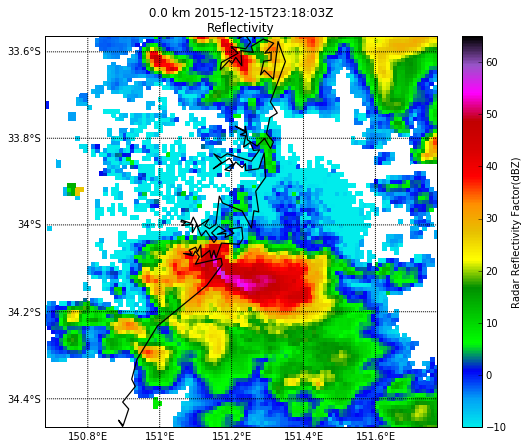

In [39]:
#Setup figure
plt.figure(figsize=[9,7])
#Create grid display object
grid_display = pyart.graph.GridMapDisplay(grids)
#plot up basemap for display
grid_display.plot_basemap(resolution = 'i',
                     lat_lines = np.arange(-35,-33,.2), lon_lines = np.arange(150, 152, .2))
#plot up gridded reflectivity
grid_display.plot_grid('DBZH', level=0, vmin=-10, vmax=65,
                     cmap = 'pyart_NWSRef')


---
Once we have a gridded dataset, we can also plot arbitrary vertical cross sections using the [plot_longitude_slice](http://arm-doe.github.io/pyart-docs-travis/user_reference/generated/pyart.graph.GridMapDisplay.plot_longitude_slice.html#pyart.graph.GridMapDisplay.plot_longitude_slice) and [plot_latitude_slice](http://arm-doe.github.io/pyart-docs-travis/user_reference/generated/pyart.graph.GridMapDisplay.plot_latitude_slice.html#pyart.graph.GridMapDisplay.plot_latitude_slice) functions

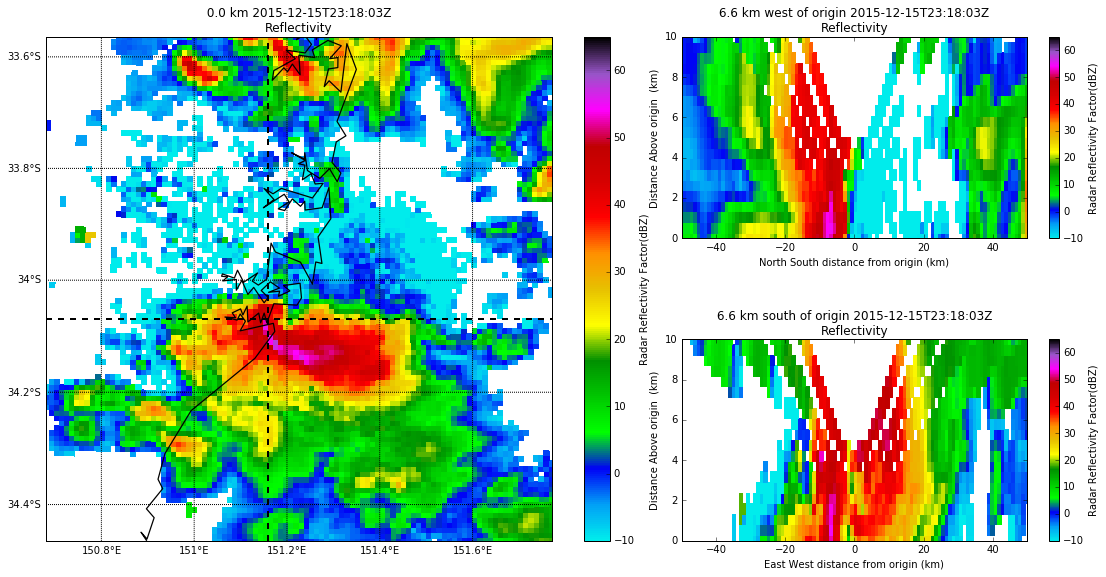

In [40]:
fig = plt.figure(figsize=[15, 7])

# panel sizes for seperate plots
map_panel_axes     = [0.0, 0.0, 0.6, 1]
lat_cut_panel_axes = [0.6, 0.0, 0.4, 0.4]
lon_cut_panel_axes = [0.6, 0.6, 0.4, 0.4]

#cross section locations
clon  = 151.16
clat  = -34.07

# panel 1
ax1 = fig.add_axes(map_panel_axes)
grid_display.plot_basemap(resolution = 'i',
                         lat_lines = np.arange(-35,-33,.2), lon_lines = np.arange(150, 152, .2))
grid_display.plot_grid('DBZH', level=0, vmin=-10, vmax=65,
                         cmap = 'pyart_NWSRef')
grid_display.plot_crosshairs(lon=clon, lat=clat,line_style='k--')

# panel 2, longitude slice.
ax2 = fig.add_axes(lon_cut_panel_axes)
ax2.set_ylim([0,10])
ax2.set_xlim([-50,50])
grid_display.plot_longitude_slice('DBZH', lon=clon, lat=clat, vmin=-10, vmax=65,
                            cmap = pyart.graph.cm.NWSRef)
# panel 3, latitude slice
ax3 = fig.add_axes(lat_cut_panel_axes)
ax3.set_ylim([0,10])
ax3.set_xlim([-50,50])
grid_display.plot_latitude_slice('DBZH', lon=clon, lat=clat, vmin=-10, vmax=65,
                           cmap = pyart.graph.cm.NWSRef)